# Exploratory Data Analysis (EDA) for Linear Regression

## Introduction
Exploratory Data Analysis (EDA) is a crucial step in any data analysis or modeling project. In the context of linear regression, EDA helps us understand the relationships between variables, identify outliers, check for data distribution, and assess the assumptions of linear regression.

## Importing Libras sns


In [1]:
import numpy as np
import pandas as pd

In [2]:
data_path = './dataset/smartwatches.csv'

In [3]:
df = pd.read_csv(data_path)

In [4]:
#removing the duplicates
df.drop_duplicates(inplace = True)

In [5]:
#display the data
df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [6]:
df.shape

(450, 16)

# Splitting Data into Training and Testing Sets

Before building our linear regression model, it's essential to split our dataset into training and testing sets. This allows us to train the model on one portion of the data and evaluate its performance on another unseen portion. The common practice is to use a larger portion of the data for training and a smaller portion for testing.

We can use the `train_test_split` function from the Scikit-learn library to accomplish this. This function randomly splits the dataset into training and testing sets based on a specified ratio.

# Splitting the data into 80% training and 20% testing


In [7]:
train_df = df.sample(frac=0.8 , random_state=42)

In [8]:
train_df = train_df.reset_index()

In [9]:
test_df = test_df.reset_index()

NameError: name 'test_df' is not defined

In [10]:
test_df = df.drop(train_df.index)

In [11]:
print(train_df.shape , test_df.shape)

(360, 17) (90, 16)


In [12]:
#display data from below
train_df.tail()

,index,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
355,216,216,fitbit,11699.0,14999.0,22.001467,4.3,3999.0,Versa 2,Square,Black,Silicon,Yes,3.5,Yes,1.3 inches,20 - 35 g
356,279,279,garmin,39490.0,44990.0,12.224939,4.7,109.0,"Instinct 2, Rugged Outdoor Watch with GPS, Bui...",Circle,Grey,Silicon,No,17.5,Yes,0.9 inches,NaN
357,390,390,zebronics,2199.0,4999.0,56.011202,3.9,272.0,Zeb-Fit Me,Square,Green,Thermo Plastic Polyurethene,Yes,22.0,Yes,3.3 inches,20 - 35 g
358,337,337,gizmore,1199.0,4499.0,73.349633,4.7,NaN,GizFit CLOUD 1.85 IPS Large Display | AI Voice...,Square,Blue,Silicon,Yes,22.0,Yes,1.8 inches,20 - 35 g
359,236,236,fitbit,20499.0,NaN,NaN,4.7,NaN,Fitbit Versa 4 Fitness Watch (Waterfall Blue /...,Curved,Blue,Rubber,Yes,22.0,Yes,0.2 inches,NaN


In [13]:
# finding the data types
train_df.dtypes

index                    int64
Unnamed: 0               int64
Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size            object
Weight                  object
dtype: object

In [14]:
# null values in data
train_df.isna().sum()

index                    0
Unnamed: 0               0
Brand                    0
Current Price            6
Original Price          56
Discount Percentage     56
Rating                   4
Number OF Ratings       45
Model Name              30
Dial Shape             100
Strap Color            100
Strap Material          56
Touchscreen             31
Battery Life (Days)     30
Bluetooth                5
Display Size            27
Weight                 149
dtype: int64

In [15]:
# detaials of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                360 non-null    int64  
 1   Unnamed: 0           360 non-null    int64  
 2   Brand                360 non-null    object 
 3   Current Price        354 non-null    float64
 4   Original Price       304 non-null    float64
 5   Discount Percentage  304 non-null    float64
 6   Rating               356 non-null    float64
 7   Number OF Ratings    315 non-null    float64
 8   Model Name           330 non-null    object 
 9   Dial Shape           260 non-null    object 
 10  Strap Color          260 non-null    object 
 11  Strap Material       304 non-null    object 
 12  Touchscreen          329 non-null    object 
 13  Battery Life (Days)  330 non-null    float64
 14  Bluetooth            355 non-null    object 
 15  Display Size         333 non-null    obj

# Identifying Numerical and Categorical Data
Before proceeding with linear regression, it's crucial to understand the types of features in our dataset. Features can be broadly categorized into numerical (continuous) and categorical (discrete) data.

**Numerical Data**: Numerical features represent continuous data that can take on any value within a range. These features are typically quantitative and can be measured on a continuous scale. 
- `Current Price`
- `Original Price`
- `Discount Percentage`
- `Rating`
- `Number OF Ratings`
- `Battery Life (Days)`

**Categorical Data**: Categorical features represent discrete data that fall into specific categories or groups. These features are typically qualitative and can take on a limited number of distinct values. 
- `Brand`
- `Model Name`
- `Dial Shape`
- `Strap Color`
- `Strap Material`
- `Touchscreen`
- `Bluetooth`
- `Display Size`
- `Weight`


In [16]:
# Numerical Data

In [17]:
numerical_data = [feature for feature in train_df.columns if train_df[feature].dtype != 'object']

In [18]:
numerical_data

['index',
 'Unnamed: 0',
 'Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [19]:
#Continous Data

In [20]:
continous_data = [feature for feature in train_df.columns if train_df[feature].dtype == 'object']

In [21]:
continous_data

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth',
 'Display Size',
 'Weight']

### statistical value of numerical data

In [22]:
train_df[numerical_data].describe()

,index,Unnamed: 0,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
count,360.000000,360.000000,354.000000,304.000000,304.000000,356.000000,315.000000,330.000000
mean,222.702778,222.702778,12514.378531,14415.835526,47.955347,4.027528,10671.815873,14.181970
std,130.632905,130.632905,16914.978666,15613.457236,24.696899,0.556828,27575.956948,7.661878
min,0.000000,0.000000,1199.000000,1669.000000,-79.688436,1.000000,1.000000,0.750000
25%,111.750000,111.750000,2126.000000,5999.000000,33.177427,3.900000,55.000000,8.000000
50%,222.500000,222.500000,3999.000000,7994.500000,53.068408,4.100000,830.000000,17.500000
75%,336.250000,336.250000,17367.250000,17996.000000,66.677780,4.300000,7576.500000,22.000000
max,448.000000,448.000000,98990.000000,96390.000000,91.004550,5.000000,275607.000000,22.000000


In [23]:
#checking corealtion of the data
train_df[numerical_data].corr()

,index,Unnamed: 0,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
index,1.000000,1.000000,-0.100146,-0.084262,-0.123792,-0.247504,-0.187509,0.371223
Unnamed: 0,1.000000,1.000000,-0.100146,-0.084262,-0.123792,-0.247504,-0.187509,0.371223
Current Price,-0.100146,-0.100146,1.000000,0.971497,-0.602668,0.397179,-0.195773,0.030352
Original Price,-0.084262,-0.084262,0.971497,1.000000,-0.479494,0.325818,-0.180650,-0.132527
Discount Percentage,-0.123792,-0.123792,-0.602668,-0.479494,1.000000,-0.191073,0.235221,-0.011792
Rating,-0.247504,-0.247504,0.397179,0.325818,-0.191073,1.000000,0.085250,-0.102289
Number OF Ratings,-0.187509,-0.187509,-0.195773,-0.180650,0.235221,0.085250,1.000000,0.009617
Battery Life (Days),0.371223,0.371223,0.030352,-0.132527,-0.011792,-0.102289,0.009617,1.000000


In [24]:
#skewness of the data
train_df[numerical_data].skew()

index                  0.012368
Unnamed: 0             0.012368
Current Price          2.301689
Original Price         2.734265
Discount Percentage   -0.983632
Rating                -1.589043
Number OF Ratings      5.467630
Battery Life (Days)   -0.190298
dtype: float64

# Data Profiling

Data profiling is a crucial step in the data analysis process that involves examining and summarizing the characteristics of a dataset. It provides valuable insights into the data distribution, missing values, correlations, and other patterns, helping to understand the underlying structure and quality of the dataset.

## Using Pandas Profiling

We will utilize the `pandas_profiling` library to generate a comprehensive report on our dataset. This report will include various statistics, visualizations, and insights to facilitate our understanding of the data.


In [25]:
import warnings

# Suppress specific warning by category
warnings.filterwarnings("ignore", category=DeprecationWarning)


!pip install pandas-profiling


  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.0
    Uninstalling joblib-1.4.0:
      Successfully uninstalled joblib-1.4.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.4.1.post1 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.
ydata-profiling 4.1.2 requires requests<2.29,>=2.24.0, but you have requests 2.31.0 which is incompatible.
ydata-profiling 4.1.2 requires visions[type_image_path]==0.7.5, but you have visions 0.7.4 which is incompatible.


In [26]:
import ydata_profiling

# Perform Pandas Profiling
profile = train_df.profile_report()

# Save the report to a file
profile.to_file("regression_report.html")


C:\Users\banda\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\banda\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Visualization: Univariate and Multivariate Analysis

Data visualization is an essential tool for understanding the distribution and relationships within a dataset. In this section, we'll explore both univariate (analysis of single variables) and multivariate (analysis of relationships between multiple variables) visualization techniques.





In [27]:
# importing lib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [28]:
numerical_data.remove('index')
numerical_data.remove('Unnamed: 0')

In [29]:
numerical_data

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

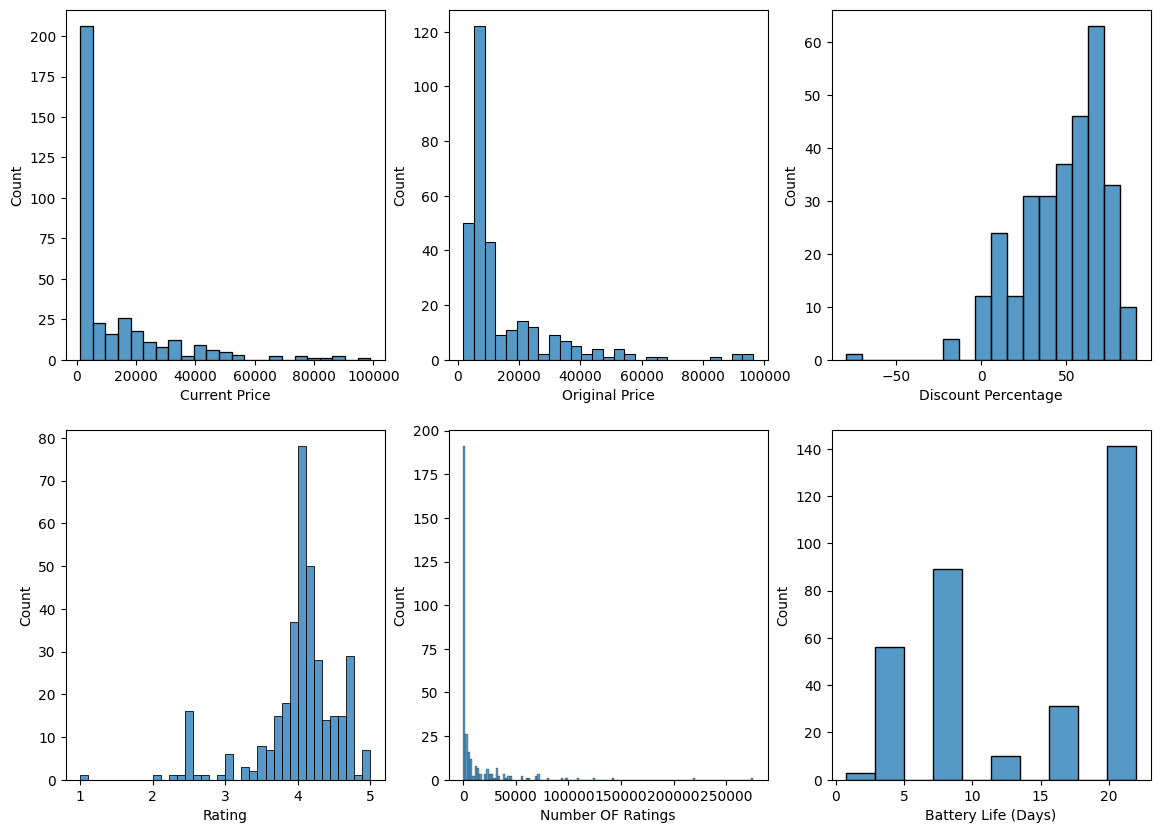

In [30]:
fig , axes = plt.subplots(nrows=2,ncols=3,figsize=(14,10))

for i , colm in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row , col]
    sns.histplot(data=train_df[colm], ax = ax)
plt.show()

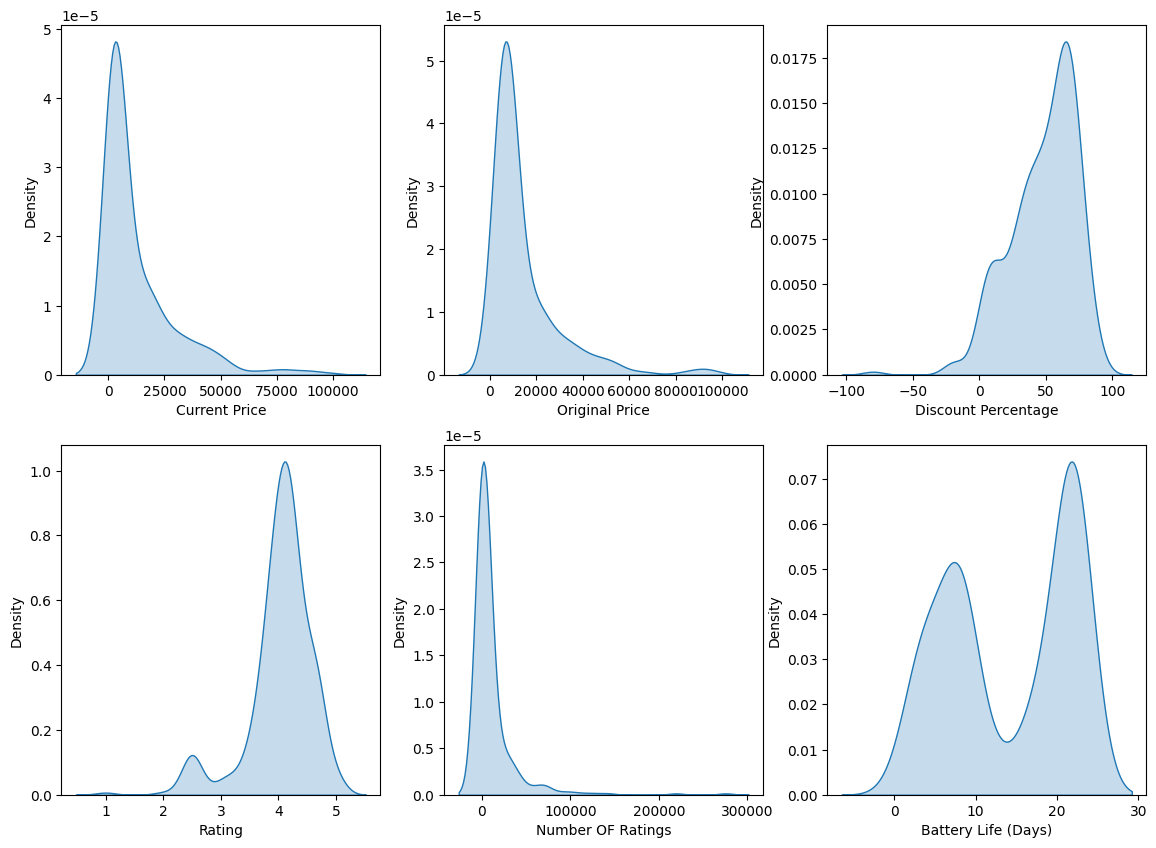

In [31]:
fig , axes = plt.subplots(nrows=2,ncols=3,figsize=(14,10))

for i , colm in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row , col]
    sns.kdeplot(data=train_df[colm], ax = ax , fill=True)
plt.show()

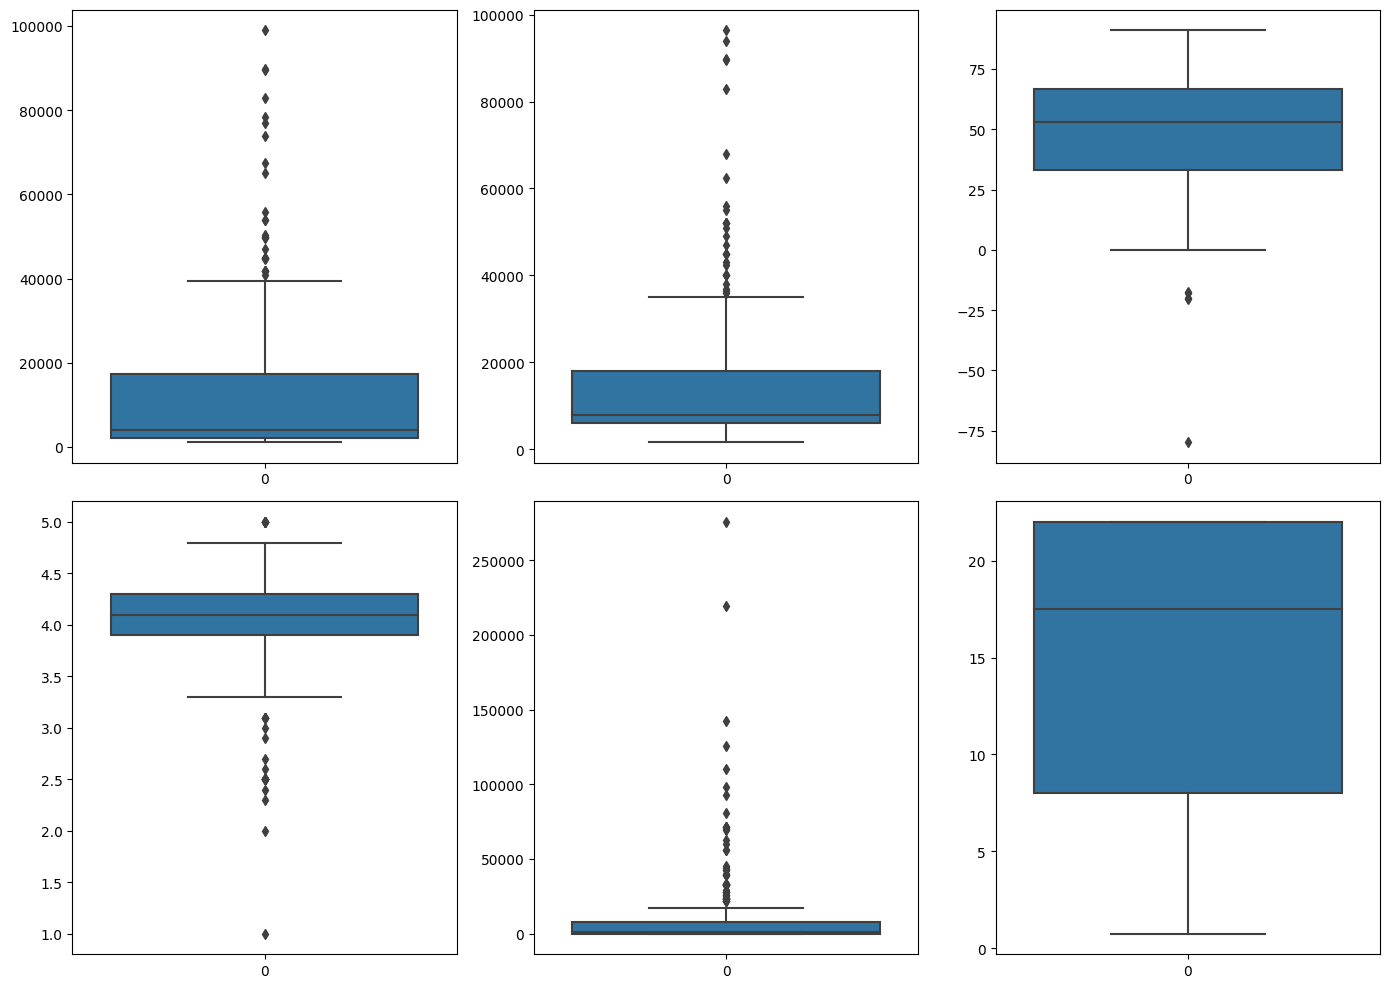

In [32]:
fig , axes = plt.subplots(nrows=2,ncols=3,figsize=(14,10))

for i , colm in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row , col]
    sns.boxplot(data=train_df[colm], ax = ax)
fig.tight_layout()
plt.show()

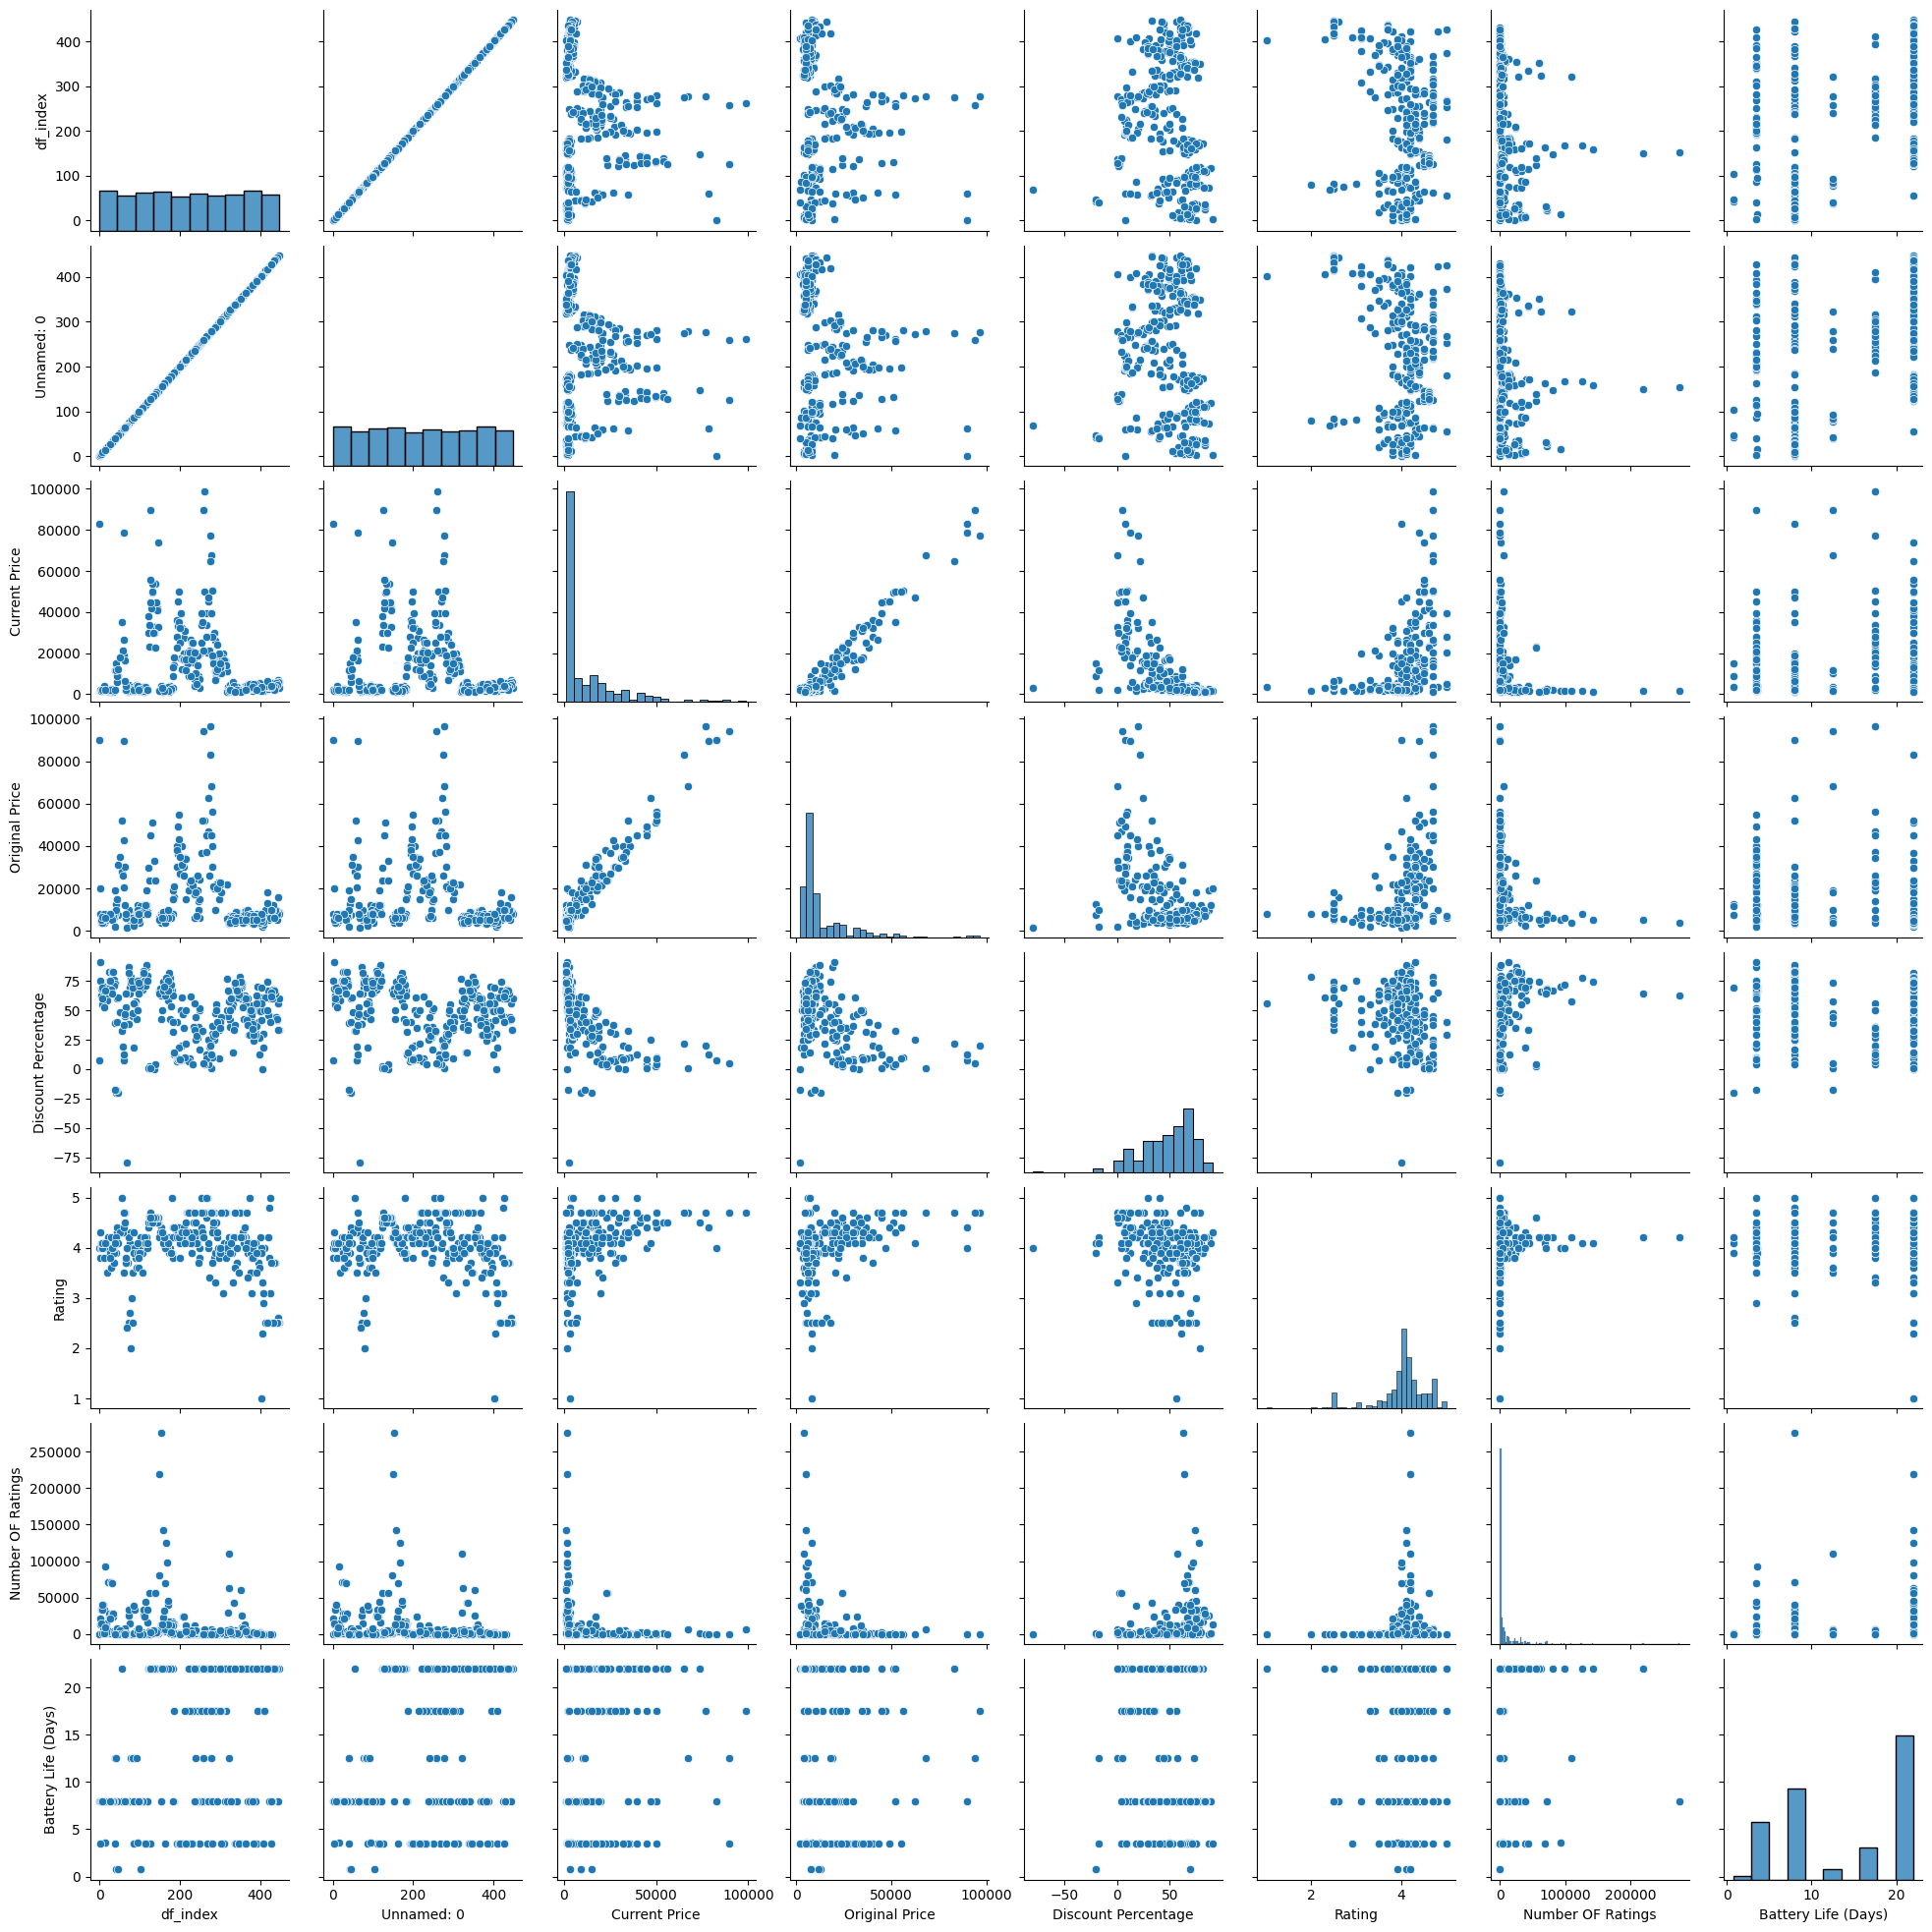

In [33]:
sns.pairplot(train_df)

C:\Users\banda\AppData\Local\Temp\ipykernel_11940\3807998228.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr())


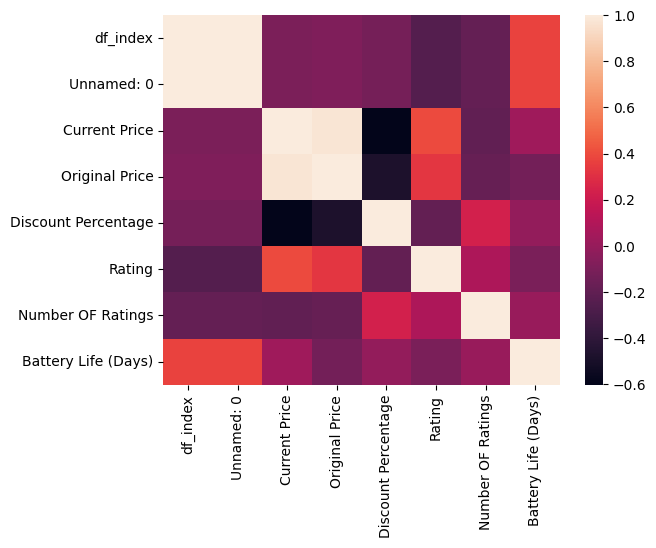

In [34]:
sns.heatmap(train_df.corr())
plt.show()

# Feature Engineering

Feature engineering is a crucial step in the machine learning pipeline that involves creating new features or transforming existing ones to enhance the performance of predictive models. In this section, we'll explore various techniques for feature engineering.

## Handling Missing Values

Dealing with missing values is essential as many machine learning algorithms cannot handle them. There are several strategies for handling missing values:

- **Imputation**: Replace missing values with a suitable statistic such as mean, median, or mode.
- **Deletion**: Remove rows or columns with missing values if they are insignificant or too many.



In [35]:
# importing
import re

%matplotlib inline

In [36]:
# importing and spiltting of data for feature engineering
data_path = './dataset/smartwatches.csv'
df = pd.read_csv(data_path)
df.drop_duplicates(inplace=True)
train_df = df.sample(frac=0.8 , random_state=42) # 80 , 20 format spilt
test_df = df.drop(train_df.index)
train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [37]:
train_df = df.copy()

In [38]:
df.shape , train_df.shape,test_df.shape

((450, 16), (450, 16), (90, 17))

In [39]:
train_df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [40]:
# removing uncessary col.
train_df.drop(['index','Unnamed: 0'] , axis=1 , inplace=True)

KeyError: "['index'] not found in axis"

In [41]:
train_df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


## Splitting Data into Numerical and Categorical Columns
To facilitate analysis and preprocessing, it's often helpful to separate the dataset into numerical and categorical columns.

### Numerical Columns
Numerical columns contain data that can be treated as numerical values, such as integers or floating-point numbers.

### Categorical Columns
Categorical columns contain data that consists of categories, labels, or text.



In [42]:
# chekcing null values
# display size
train_df['Display Size'].isna().sum()

30

In [43]:
train_df['Display Size'].value_counts().count()

40

In [44]:
train_df['Display Size'].fillna('0.0 inches', inplace=True)

In [45]:
train_df['Display Size'].isna().sum()

0

In [46]:
train_df['Display Size'] = train_df['Display Size'].apply(lambda x: float(x.split()[0]))

In [47]:
train_df['Display Size'].head()

0    0.0
1    1.8
2    1.7
3    1.8
4    1.7
Name: Display Size, dtype: float64

In [48]:
train_df['Display Size'].replace(0.0,np.nan,inplace=True)

In [49]:
train_df['Display Size'].isna().sum()

31

In [50]:
# weight data
train_df['Weight'].value_counts()

20 - 35 g    80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: Weight, dtype: int64

In [51]:
re.findall('\d+','20 - 35 g')

['20', '35']

In [52]:
cal = sum([int(x) for x in re.findall('\d+', '20 - 35 g ')]) / 2
train_df['Weight'].replace('20 - 35 g', cal, inplace=True)

In [53]:
cal = sum([int(x) for x in re.findall('\d+', '35 - 50 g')]) / 2
train_df['Weight'].replace('35 - 50 g', cal, inplace=True)

In [54]:
cal = sum([int(x) for x in re.findall('\d+', '50 - 75 g')]) / 2
train_df['Weight'].replace('50 - 75 g', cal, inplace=True)

In [55]:
train_df['Weight'].replace('75g +', float(re.findall('\d+', '75g +')[0]), inplace=True)


In [56]:
train_df['Weight'].replace('<= 20 g', float(re.findall('\d+', '<= 20 g')[0]), inplace=True)


In [57]:
train_df['Weight'].value_counts()


27.5    80
75.0    66
42.5    58
20.0    43
62.5    17
Name: Weight, dtype: int64

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           450 non-null    int64  
 1   Brand                450 non-null    object 
 2   Current Price        440 non-null    float64
 3   Original Price       377 non-null    float64
 4   Discount Percentage  377 non-null    float64
 5   Rating               444 non-null    float64
 6   Number OF Ratings    391 non-null    float64
 7   Model Name           415 non-null    object 
 8   Dial Shape           327 non-null    object 
 9   Strap Color          327 non-null    object 
 10  Strap Material       381 non-null    object 
 11  Touchscreen          413 non-null    object 
 12  Battery Life (Days)  418 non-null    float64
 13  Bluetooth            444 non-null    object 
 14  Display Size         419 non-null    float64
 15  Weight               264 non-null    flo

In [59]:
train_df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,42.5
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,62.5
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7,42.5
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,75.0
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7,42.5


In [60]:
# discount percentage into price
# train_df['Discount Price'] = (train_df['Original Price'] * (-train_df['Discount Percentage']) / 100)
train_df['Discount Price'] = train_df['Original Price'] - (train_df['Original Price'] * train_df['Discount Percentage'] / 100)


In [61]:
train_df.drop(['Discount Percentage'], axis=1,inplace=True)

In [62]:
train_df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Discount Price
0,0,noise,82990.0,89900.0,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,42.5,82990.000000
1,1,fire-boltt,3799.0,16999.0,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,62.5,3798.999999
2,2,boat,1999.0,7990.0,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7,42.5,1999.000000
3,3,fire-boltt,1799.0,19999.0,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,75.0,1799.000000
4,4,noise,1599.0,4999.0,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7,42.5,1599.000000


#### Numerical Data

In [63]:
numerical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'float64']

In [64]:
numerical_col

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           450 non-null    int64  
 1   Brand                450 non-null    object 
 2   Current Price        440 non-null    float64
 3   Original Price       377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         419 non-null    float64
 14  Weight               264 non-null    float64
 15  Discount Price       377 non-null    flo

In [66]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,82990.0,89900.0,4.0,65.0,8.0,NaN,42.5,82990.000000
1,3799.0,16999.0,4.3,20788.0,3.5,1.8,62.5,3798.999999
2,1999.0,7990.0,3.8,21724.0,8.0,1.7,42.5,1999.000000
3,1799.0,19999.0,4.3,13244.0,3.5,1.8,75.0,1799.000000
4,1599.0,4999.0,4.1,13901.0,8.0,1.7,42.5,1599.000000


In [67]:
# for skew data we will median value 
# first remove outliers


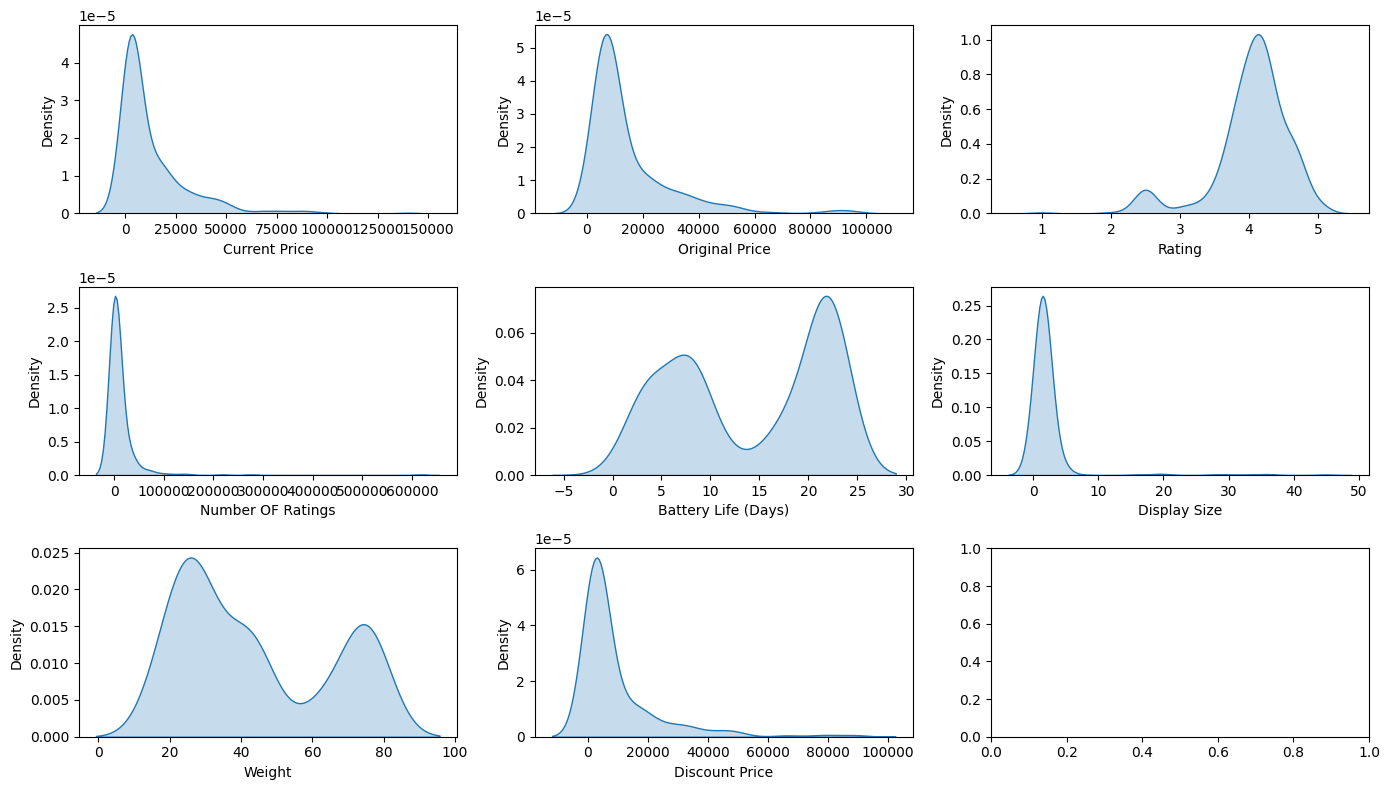

In [68]:
fig , axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 8))

for i , colum in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.kdeplot(data=train_df[colum], ax=ax, fill=True)

fig.tight_layout()
plt.show()

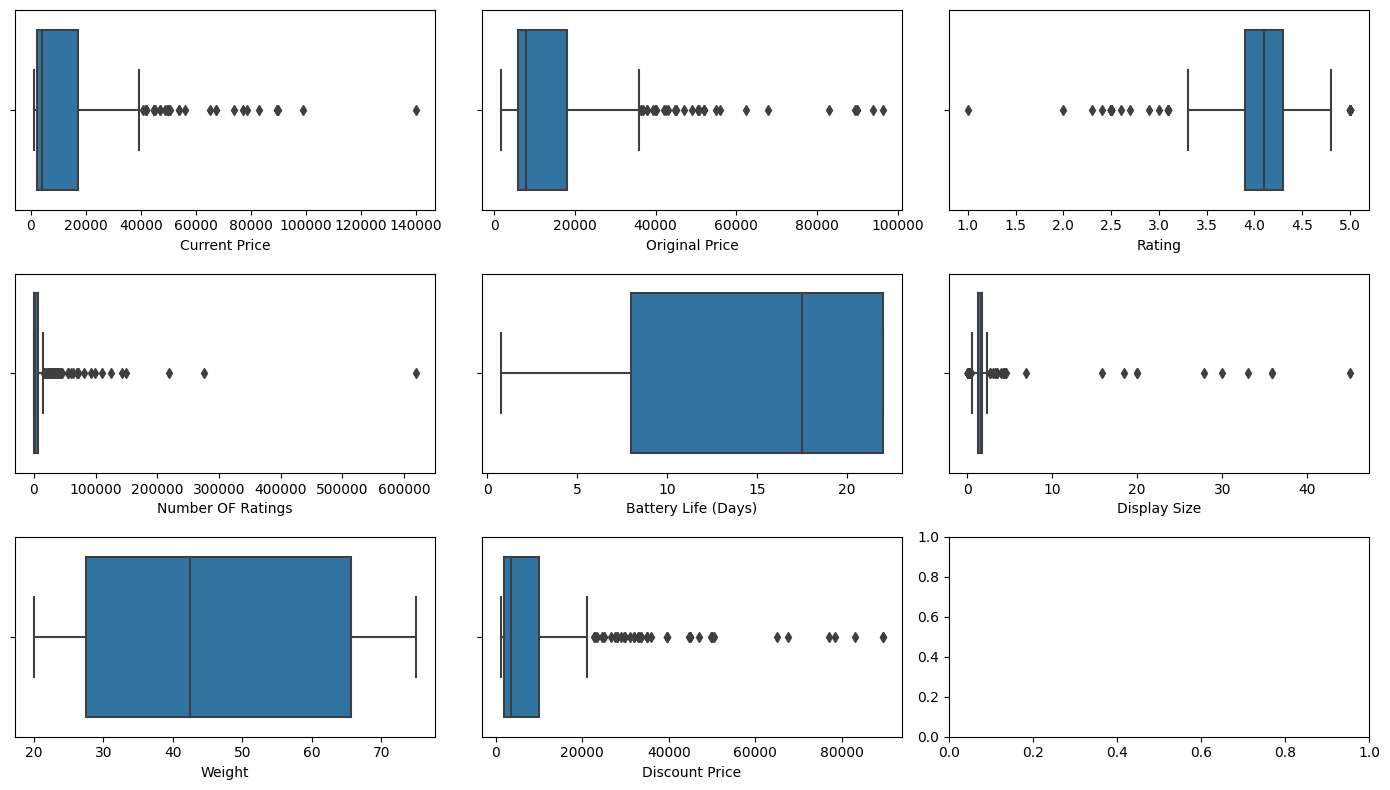

In [69]:
fig , axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 8))

for i , colum in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=train_df[colum], ax=ax)

fig.tight_layout()
plt.show()

In [70]:
def remove_outliers_IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] > lower_bound) & (data[col] < upper_bound)]

In [71]:
train_df.columns

Index(['Unnamed: 0', 'Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'Discount Price'],
      dtype='object')

In [72]:
import_col = ['Current Price', 'Original Price', 'Rating', 'Number OF Ratings','Display Size']

In [73]:
for col in import_col:
    train_df = remove_outliers_IQR(train_df,col)

In [74]:
# imputation of null values
for col in numerical_col:
    train_df[col].fillna(train_df[col].median(), inplace=True)

In [75]:
train_df.isna().sum()

Unnamed: 0              0
Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             65
Strap Color            65
Strap Material         26
Touchscreen             6
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
dtype: int64

In [114]:
train_df['numerical_col'].head()

KeyError: 'numerical_col'

In [115]:
!pip install scikit-learn

In [78]:
# scaling of the data
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()

In [80]:
data = scaler.fit_transform(train_df[numerical_col[:-1]])

In [81]:
data

array([[0.1116311 , 0.56836451, 0.83333333, ..., 0.12941176, 0.61538462,
        0.77272727],
       [0.03434803, 0.22996018, 0.41666667, ..., 0.34117647, 0.53846154,
        0.40909091],
       [0.02576102, 0.68105326, 0.83333333, ..., 0.12941176, 0.61538462,
        1.        ],
       ...,
       [0.02996866, 0.00116445, 0.        , ..., 1.        , 1.        ,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091]])

In [82]:
data = pd.DataFrame(data, columns=numerical_col[:-1])

In [83]:
data.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091


In [84]:
data.shape , train_df.shape

((181, 7), (181, 16))

In [85]:
data.isna().sum() #no null values now

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
dtype: int64

In [86]:
# remove the data and replace with this new data
train_df.drop(numerical_col[:-1], axis=1,inplace=True)

In [87]:
train_df.head()

,Unnamed: 0,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price
1,1,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes,3798.999999
2,2,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes,1999.000000
3,3,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes,1799.000000
4,4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes,1599.000000
5,5,noise,NSW-05,NaN,NaN,Other,Yes,Yes,1499.000000


In [88]:
pd.concat([train_df.reset_index(),data],axis=1).shape

(181, 17)

In [89]:
train_df = pd.concat([train_df.reset_index(),data],axis=1)

In [90]:
train_df.isna().sum()

index                   0
Unnamed: 0              0
Brand                   0
Model Name              9
Dial Shape             65
Strap Color            65
Strap Material         26
Touchscreen             6
Bluetooth               0
Discount Price          0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Battery Life (Days)     0
Display Size            0
Weight                  0
dtype: int64

In [91]:
train_df[numerical_col]

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,3798.999999
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,1999.000000
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,1799.000000
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,1599.000000
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,1499.000000
...,...,...,...,...,...,...,...,...
176,0.184621,0.211517,0.500000,0.000569,1.000000,0.615385,0.409091,5499.000000
177,0.068696,0.136391,0.500000,0.000569,1.000000,0.538462,0.409091,2799.000000
178,0.029969,0.001164,0.000000,0.000030,1.000000,1.000000,0.409091,1897.000000
179,0.120218,0.305424,0.333333,0.000000,1.000000,0.538462,0.409091,3999.000000


#### Categorical Data

In [92]:
categorical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'object']

In [93]:
categorical_col

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

In [94]:
train_df[categorical_col].head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth
0,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes
1,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes
2,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes
3,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes
4,noise,NSW-05,NaN,NaN,Other,Yes,Yes


In [95]:
categorical_col.remove('Bluetooth')

### Analysis of Variance (ANOVA) Test 

In [96]:
from scipy.stats import f_oneway

In [97]:
for col in categorical_col:
    CategoryGroupLists = train_df.groupby(col)['Discount Price'].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    print(col, ': ', 'P-Value for anova is: ',AnovaResults[1])

Brand :  P-Value for anova is:  1.516880315270587e-49
Model Name :  P-Value for anova is:  2.101327130245777e-21
Dial Shape :  P-Value for anova is:  5.968866964470313e-10
Strap Color :  P-Value for anova is:  0.020629468238554233
Strap Material :  P-Value for anova is:  0.0007689995903645887
Touchscreen :  P-Value for anova is:  0.3651107348805016


In [98]:
imp_col= ['Brand', 'Model Name', 'Dial Shape', 'Strap Material']

In [99]:
train_df[imp_col].head()

,Brand,Model Name,Dial Shape,Strap Material
0,fire-boltt,BSW046,NaN,Silicon
1,boat,Wave Call,NaN,Silicon
2,fire-boltt,BSW053,NaN,Silicon
3,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,Other
4,noise,NSW-05,NaN,Other


In [100]:
for col in imp_col:
    train_df[col].fillna('other', inplace=True)

In [101]:
train_df[imp_col].isna().sum()

Brand             0
Model Name        0
Dial Shape        0
Strap Material    0
dtype: int64

In [120]:
brand = pd.get_dummies(train_df['Brand'], drop_first=True)


In [121]:
model_name = pd.get_dummies(train_df['Model Name']).drop(['other'],axis=1)
dial_shape = pd.get_dummies(train_df['Dial Shape']).drop(['other'],axis=1)
strap_material = pd.get_dummies(train_df['Strap Material']).drop(['other'],axis=1)

In [122]:
imp_df = pd.concat([brand, model_name, dial_shape, strap_material], axis=1)

In [123]:
imp_df.head()

,ambrane,boat,crossbeats,dizo,fire-boltt,fitbit,fossil,garmin,gizmore,hammer,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [124]:
new_df = pd.concat([train_df[numerical_col], imp_df], axis=1)

In [125]:
new_df.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,ambrane,boat,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,3798.999999,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,1999.000000,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,1799.000000,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,1599.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,1499.000000,0,0,...,0,0,0,1,0,0,0,0,0,0


In [126]:
new_df.isna().sum()

Current Price                  0
Original Price                 0
Rating                         0
Number OF Ratings              0
Battery Life (Days)            0
                              ..
Rubber                         0
Silicon                        0
Stainless Steel                0
Synthetic                      0
Thermo Plastic Polyurethene    0
Length: 201, dtype: int64

In [128]:
new_df.to_csv('./dataset/clean.csv', index=False)

# Model Building


In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline


In [130]:
df = pd.read_csv('./dataset/clean.csv')

In [131]:
df.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,ambrane,boat,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,3798.999999,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,1999.000000,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,1799.000000,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,1599.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,1499.000000,0,0,...,0,0,0,1,0,0,0,0,0,0


In [132]:
df.shape


(181, 201)

In [133]:
X = df.drop('Discount Price', axis=1)
y = df['Discount Price']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing


In [135]:
df.shape

(181, 201)

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

res = r2_score(y_test, y_pred)
print(res)

-788.3087772160325


In [137]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

0.9986115532781012


In [138]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

0.996530321412847


In [139]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

0.9974649193498042


# Cross Validation

In [140]:
from sklearn.model_selection import cross_val_score

In [141]:
# decision tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(dt_model, X, y, cv=5, scoring='r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.9987025116748892
cross_val_score:  [0.99511224 0.99480312 0.96753023 0.96399898 0.96444867] 0.9771786469172585 0.014567660892136743


In [142]:
# random forest
# from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print('cross_val_score: ', score, score.mean(), score.std())


0.996118957862225
cross_val_score:  [0.99830286 0.99871039 0.96896457 0.99062125 0.991838  ] 0.9896874143449901 0.010868058299065357


In [143]:
# XGBoost
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(model, X, y, cv=5, scoring='r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.9979338291618491
cross_val_score:  [0.99927612 0.99890626 0.98859293 0.9861777  0.99178075] 0.9929467522053013 0.005323756836245992


In [144]:
# hyper tuning for xgboost
from sklearn.model_selection import GridSearchCV

In [145]:
param_gird = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_gird, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = xgb.XGBRegressor(**best_params)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)


0.9977989382847242


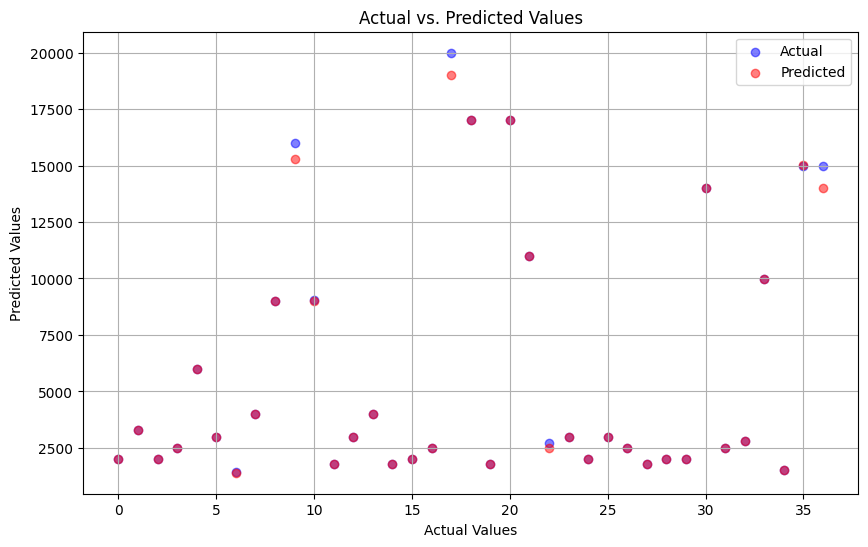

In [152]:
import matplotlib.pyplot as plt

# Generate a continuous index for the data points
index = range(len(y_test))

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(index, y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


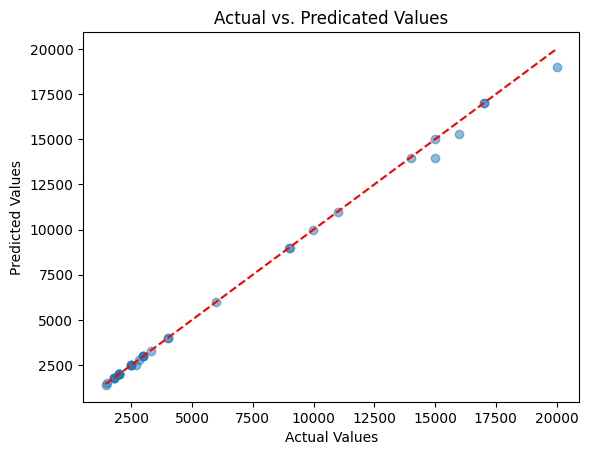

In [147]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, y_pred, alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicated Values')
plt.show()

In [148]:
import pandas as pd

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})
print(results_df.head())  # Display first few rows of the DataFrame

# Alternatively, you can create two lists
actual_values = y_test.tolist()
predicted_values = y_pred.tolist()

# Display the first few values in the lists
print("Actual Values:", actual_values[:5])
print("Predicted Values:", predicted_values[:5])


     Actual Values  Predicted Values
19          1999.0       1998.689209
42          3299.0       3298.917480
153         1999.0       1999.114258
78          2499.0       2498.772949
145         5999.0       5997.021973
Actual Values: [1999.000000253, 3299.0000000125, 1998.9999999963, 2499.0000003160003, 5999.0000002539]
Predicted Values: [1998.689208984375, 3298.91748046875, 1999.1142578125, 2498.77294921875, 5997.02197265625]


In [149]:
import pickle

with open('model.pkl' , 'wb') as f:
    pickle.dump(best_model , f)
    


In [150]:
with open('model.pkl' , 'rb') as f:
    xgb_model = pickle.load(f)

In [151]:
y_pred = xgb_model.predict(X_test)
print(r2_score(y_test,y_pred))

0.9977989382847242
